In [199]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
import plotly.plotly as py
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import warnings
import matplotlib.style as style
from scipy.stats import t as student_t
from statsmodels.graphics.factorplots import interaction_plot
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from statsmodels.api import OLS
style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [131]:
data = pd.read_csv('data_cleaned.csv',index_col='listing_id')

In [132]:
data.head()

,price,quantity,featured_rank,views,num_favorers,is_customizable,is_digital,tags_present,title_present,description_present,...,occasion_mothers_day,occasion_new_baby,occasion_new_years,occasion_st_patricks_day,occasion_sweet_16,occasion_sympathy,occasion_thanksgiving,occasion_valentines,occasion_wedding,occasion_nan
listing_id,,,,,,,,,,,,,,,,,,,,,
7649083,115.00,1,0.0,1324,106,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
10425632,74.95,824,0.0,34481,2130,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
12810967,5.99,1,0.0,378,8,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
12813403,11.15,4,0.0,2681,93,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
12864872,92.00,1,0.0,1243,92,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [133]:
X = data[[x for x in data.columns if x not in ['num_favorers','views']]]
y = np.log(data['views'])

In [134]:
X['price'] = np.log(X['price'])
X['quantity'] = np.log(X['quantity'])

In [135]:
y.replace(-float('Inf'),0,inplace=True)

In [136]:
X.replace(-float('Inf'),0,inplace=True)

In [137]:
X.replace(float('NaN'),0,inplace=True)
y.replace(float('NaN'),0,inplace=True)

In [170]:
X['price_zero'] = [0 if x>0 else 1 for x in X['price']]

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [173]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

In [174]:
params = {
    'application': 'regression',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

In [175]:
model = lgb.train(params=params,train_set=train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's l2: 7.38871
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 7.28445
[3]	valid_0's l2: 7.19305
[4]	valid_0's l2: 7.11571
[5]	valid_0's l2: 7.04355
[6]	valid_0's l2: 6.9786
[7]	valid_0's l2: 6.81326
[8]	valid_0's l2: 6.6661
[9]	valid_0's l2: 6.60143
[10]	valid_0's l2: 6.55733
[11]	valid_0's l2: 6.43396
[12]	valid_0's l2: 6.40943
[13]	valid_0's l2: 6.29515
[14]	valid_0's l2: 6.19166
[15]	valid_0's l2: 6.09052
[16]	valid_0's l2: 6.00902
[17]	valid_0's l2: 5.99317
[18]	valid_0's l2: 5.91716
[19]	valid_0's l2: 5.89986
[20]	valid_0's l2: 5.83599
[21]	valid_0's l2: 5.77222
[22]	valid_0's l2: 5.75119
[23]	valid_0's l2: 5.69082
[24]	valid_0's l2: 5.62964
[25]	valid_0's l2: 5.57354
[26]	valid_0's l2: 5.55889
[27]	valid_0's l2: 5.51484
[28]	valid_0's l2: 5.49921
[29]	valid_0's l2: 5.45686
[30]	valid_0's l2: 5.41321
[31]	valid_0's l2: 5.38043
[32]	valid_0's l2: 5.36583
[33]	valid_0's l2: 5.33052
[34]	valid_0's l2: 5.30117
[35]	valid_0's l2: 5.29305
[36

In [176]:
results = model.predict(X_test)

In [177]:
model.feature_importance()

array([   0, 3431, 3289,  842,  394,  419,  431,  337,  267,  226,  172,
        241,  185,  127,   89,  108,   77,   72,   64,   51,   82,   60,
         46,   20,   64])

In [178]:
results_plot = pd.DataFrame()
results_plot['covariates'] = X_train.columns
results_plot['importance'] = model.feature_importance()

In [179]:
importance = results_plot.sort_values('importance',ascending=False)

In [180]:
importance[importance['importance']>0]

,covariates,importance
1,price,3431
2,quantity,3289
3,featured_rank,842
6,is_customizable,431
5,when_made_made_to_order,419
4,when_made_2010_2018,394
7,who_made_i_did,337
8,style_present,267
11,is_digital,241
9,who_made_someone_else,226


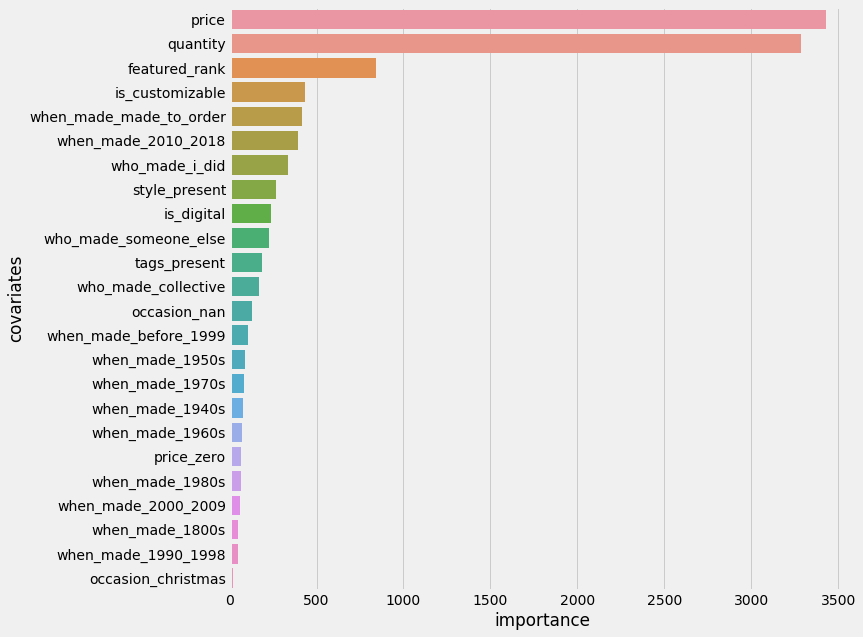

In [181]:
plt.figure(figsize=(10,10))
sns.barplot(x=importance[importance['importance']>0]['importance'],y=importance[importance['importance']>0]['covariates'])

In [182]:
model.feature_name

<bound method Booster.feature_name of <lightgbm.basic.Booster object at 0x1c1ab967f0>>

Text(0,0.5,'predicted_vals')

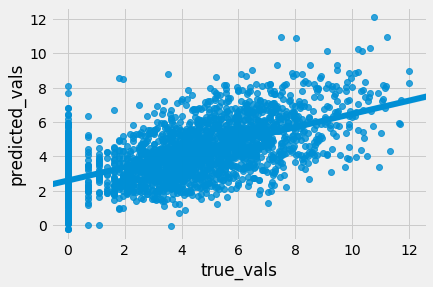

In [183]:
sns.regplot(y_test,results)
plt.xlabel('true_vals')
plt.ylabel('predicted_vals')

In [192]:
data['price_zero'] = [0 if x>0 else 1 for x in data['price']]

In [254]:
X = data[list(importance[importance['importance']>0]['covariates'])]
X['price'] = np.log(X['price'])
X['quantity'] = np.log(X['quantity'])
X.replace(-float('Inf'),0,inplace=True)
X.replace(float('NaN'),0,inplace=True)
X = sm.add_constant(X)
y = np.log(data['views'])
y.replace(-float('Inf'),0,inplace=True)
y.replace(float('NaN'),0,inplace=True)
model = sm.OLS(y, X).fit(cov_type='HC3')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     1429.
Date:                Wed, 14 Nov 2018   Prob (F-statistic):               0.00
Time:                        18:25:57   Log-Likelihood:                -26438.
No. Observations:               11331   AIC:                         5.293e+04
Df Residuals:                   11306   BIC:                         5.311e+04
Df Model:                          24                                         
Covariance Type:                  HC3                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1880      0.614     -0.306      0.759      -1.391       1.015
price                       0.1370      0.022      6.310      0.000       0.094       0.180
quantity                    0.3596      0.014     25.694      0.000       0.332       0.387
featured_rank               0.0057      0.006      0.939      0.348      -0.006       0.018
is_customizable             0.5037      0.056      9.072      0.000       0.395       0.612
when_made_made_to_order     1.0365      0.237      4.370      0.000       0.572       1.501
when_made_2010_2018         0.8299      0.229      3.623      0.000       0.381       1.279
who_made_i_did              0.9338      0.618      1.510      0.131      -0.278       2.146
style_present               1.3222      0.067     19.869      0.000       1.192       1.453
is_digital                  0.1226      0.098      1.251      0.211      -0.069       0.315
who_made_someone_else       1.0346      0.613      1.688      0.091      -0.167       2.236
tags_present                1.6231      0.103     15.688      0.000       1.420       1.826
who_made_collective         0.4325      0.626      0.691      0.490      -0.795       1.660
occasion_nan               -0.4474      0.132     -3.395      0.001      -0.706      -0.189
when_made_before_1999       0.1874      0.237      0.792      0.428      -0.276       0.651
when_made_1950s             1.1188      0.264      4.230      0.000       0.600       1.637
when_made_1970s             0.3478      0.254      1.369      0.171      -0.150       0.846
when_made_1940s             0.2955      0.344      0.858      0.391      -0.379       0.971
when_made_1960s             0.3041      0.254      1.199      0.231      -0.193       0.801
price_zero                 -0.9877      0.578     -1.709      0.087      -2.120       0.145
when_made_1980s             0.0820      0.269      0.305      0.760      -0.445       0.608
when_made_2000_2009         0.9175      0.293      3.127      0.002       0.342       1.492
when_made_1800s            -1.2365      0.358     -3.453      0.001      -1.938      -0.535
when_made_1990_1998         0.2077      0.298      0.697      0.486      -0.377       0.792
occasion_christmas         -0.6343      0.308     -2.062      0.039      -1.237      -0.031
==============================================================================
Omnibus:                       56.019   Durbin-Watson:                   0.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.235
Skew:                          -0.046   Prob(JB):                     6.74e-10
Kurtosis:                       2.715   Cond. No.                     1.72e+03
==============================================================================

Warnings:
[1] Standard Errors ar

In [151]:
corr = data[list(importance[importance['importance']>0]['covariates'])].corr()
corr.style.background_gradient()

,price,quantity,featured_rank,when_made_2010_2018,when_made_made_to_order,is_customizable,who_made_i_did,style_present,who_made_someone_else,who_made_collective,is_digital,tags_present,occasion_nan,when_made_1950s,when_made_before_1999,when_made_1940s,when_made_1960s,when_made_1980s,when_made_1800s,when_made_1970s,when_made_2000_2009,when_made_1990_1998,occasion_christmas
price,1,-0.00800027,-0.00207069,-0.04957,-0.029422,-0.0101154,-0.0597196,0.00758109,0.0464575,0.0307026,-0.0522658,-0.0182454,0.0105688,0.0379474,0.0196196,0.0166715,0.0431585,0.105386,0.0107963,0.0192953,0.00675128,0.0119436,-0.00810028
quantity,-0.00800027,1,-0.000104195,-0.021719,0.0420283,0.00485821,0.0171873,-0.0108571,-0.0246267,0.00951753,0.0232976,0.0104587,0.00304668,-0.00831949,-0.012864,-0.00536389,-0.0096359,-0.0082122,-0.00441908,-0.00917512,-0.00528346,-0.00617416,-0.00236081
featured_rank,-0.00207069,-0.000104195,1,-0.0171728,0.0209141,6.42787e-05,0.00671254,-0.0110171,-0.0267561,0.0315612,0.0039103,-0.0124018,0.00417289,-0.00738499,-0.011908,-0.00345945,-0.00944613,-0.00695772,-0.00371423,0.0444087,-0.00554892,-0.00519311,0.00267028
when_made_2010_2018,-0.04957,-0.021719,-0.0171728,1,-0.747691,-0.012939,0.102177,0.0281456,-0.125309,0.0227384,0.240259,0.0172544,-0.024904,-0.12052,-0.188173,-0.0780109,-0.143899,-0.119423,-0.0647441,-0.133684,-0.0981583,-0.0898533,0.0252469
when_made_made_to_order,-0.029422,0.0420283,0.0209141,-0.747691,1,0.166384,0.322631,-0.0522833,-0.371651,0.0312092,-0.166484,-0.0171713,0.00551994,-0.0933665,-0.145777,-0.0604348,-0.111478,-0.0925167,-0.050157,-0.103564,-0.0760429,-0.069609,-0.0142504
is_customizable,-0.0101154,0.00485821,6.42787e-05,-0.012939,0.166384,1,0.186629,0.136635,-0.186909,-0.0273677,-0.0356395,0.0767591,-0.0569245,-0.0719876,-0.0977111,-0.0346492,-0.0847191,-0.061526,-0.0282597,-0.0771516,-0.0417302,-0.0489859,0.0196426
who_made_i_did,-0.0597196,0.0171873,0.00671254,0.102177,0.322631,0.186629,1,-0.00372508,-0.829971,-0.426374,0.177766,0.00509989,-0.0205732,-0.186916,-0.290154,-0.122022,-0.218351,-0.175516,-0.0983283,-0.207658,-0.096945,-0.13416,0.0142496
style_present,0.00758109,-0.0108571,-0.0110171,0.0281456,-0.0522833,0.136635,-0.00372508,1,0.000994479,0.00527689,-0.0172261,0.0917571,-0.22701,-0.0128603,-0.0186699,0.00567174,0.0433787,0.0257092,0.00745936,0.0401726,-0.0206396,0.0151605,0.082053
who_made_someone_else,0.0464575,-0.0246267,-0.0267561,-0.125309,-0.371651,-0.186909,-0.829971,0.000994479,1,-0.149865,-0.162957,0.0253229,0.0224068,0.225386,0.344349,0.144344,0.241755,0.207445,0.1188,0.236142,0.114583,0.160029,-0.0200343
who_made_collective,0.0307026,0.00951753,0.0315612,0.0227384,0.0312092,-0.0273677,-0.426374,0.00527689,-0.149865,1,-0.0507437,-0.050309,3.41435e-05,-0.0340391,-0.0438766,-0.0176919,-0.0048099,-0.0251505,-0.018286,-0.0146812,-0.0138727,-0.0216011,0.00728082


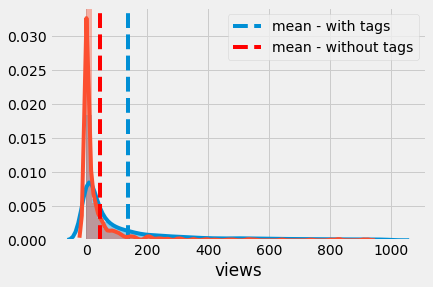

In [247]:
sns.distplot(data[(data['tags_present']==1)&(data['views']<1000)]['views'])
plt.axvline(data[(data['tags_present']==1)&(data['views']<1000)]['views'].mean(),label='mean - with tags',ls='dashed')
sns.distplot(data[(data['tags_present']==0)&(data['views']<1000)]['views'])
plt.axvline(data[(data['tags_present']==0)&(data['views']<1000)]['views'].mean(),c='r',label='mean - without tags',ls='dashed')
plt.legend(loc='upper right')

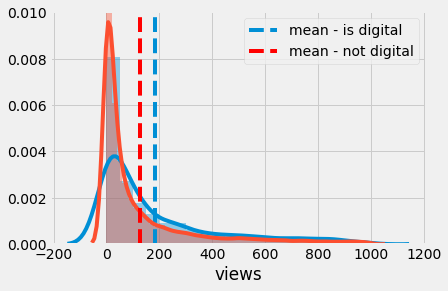

In [268]:
sns.distplot(data[(data['is_digital']==1)&(data['views']<1000)]['views'])
plt.axvline(data[(data['is_digital']==1)&(data['views']<1000)]['views'].mean(),label='mean - is digital',ls='dashed')
sns.distplot(data[(data['is_digital']==0)&(data['views']<1000)]['views'])
plt.axvline(data[(data['is_digital']==0)&(data['views']<1000)]['views'].mean(),c='r',label='mean - not digital',ls='dashed')
plt.legend(loc='upper right')

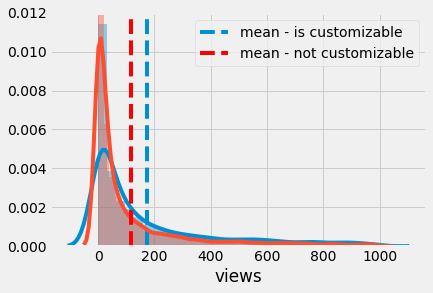

In [271]:
sns.distplot(data[(data['is_customizable']==1)&(data['views']<1000)]['views'])
plt.axvline(data[(data['is_customizable']==1)&(data['views']<1000)]['views'].mean(),label='mean - is customizable',ls='dashed')
sns.distplot(data[(data['is_customizable']==0)&(data['views']<1000)]['views'])
plt.axvline(data[(data['is_customizable']==0)&(data['views']<1000)]['views'].mean(),c='r',label='mean - not customizable',ls='dashed')
plt.legend(loc='upper right')

In [ ]:
plt.scatter(data['quantity'])

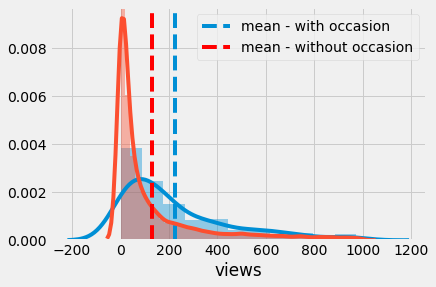

In [281]:
sns.distplot(data[(data['occasion_nan']==0)&(data['views']<1000)]['views'])
plt.axvline(data[(data['occasion_nan']==0)&(data['views']<1000)]['views'].mean(),label='mean - with occasion',ls='dashed')
sns.distplot(data[(data['occasion_nan']==1)&(data['views']<1000)]['views'])
plt.axvline(data[(data['occasion_nan']==1)&(data['views']<1000)]['views'].mean(),label='mean - without occasion',ls='dashed',c='r')
plt.legend(loc='upper right')

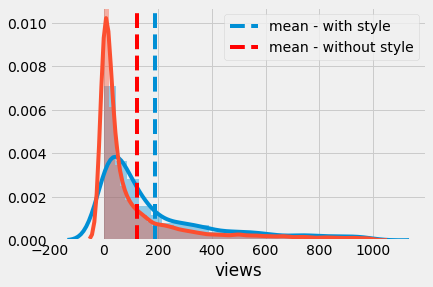

In [282]:
sns.distplot(data[(data['style_present']==1)&(data['views']<1000)]['views'])
plt.axvline(data[(data['style_present']==1)&(data['views']<1000)]['views'].mean(),label='mean - with style',ls='dashed')
sns.distplot(data[(data['style_present']==0)&(data['views']<1000)]['views'])
plt.axvline(data[(data['style_present']==0)&(data['views']<1000)]['views'].mean(),label='mean - without style',ls='dashed',c='r')
plt.legend(loc='upper right')

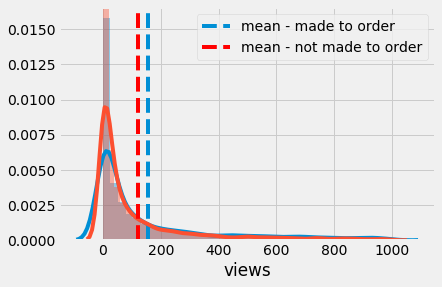

In [284]:
sns.distplot(data[(data['when_made_made_to_order']==1)&(data['views']<1000)]['views'])
plt.axvline(data[(data['when_made_made_to_order']==1)&(data['views']<1000)]['views'].mean(),label='mean - made to order',ls='dashed')
sns.distplot(data[(data['when_made_made_to_order']==0)&(data['views']<1000)]['views'])
plt.axvline(data[(data['when_made_made_to_order']==0)&(data['views']<1000)]['views'].mean(),label='mean - not made to order',ls='dashed',c='r')
plt.legend(loc='upper right')